In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuness","key":"a255cfbc1b7e14cbd160722f93254ae2"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#! kaggle datasets list

In [8]:
! kaggle datasets download -d amol07/sunglasses-no-sunglasses

 76% 41.0M/54.0M [00:00<00:00, 62.4MB/s]
100% 54.0M/54.0M [00:00<00:00, 91.3MB/s]


In [9]:
!mkdir sunglassesornot

In [ ]:
!unzip sunglasses-no-sunglasses.zip -d sunglassesornot

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [12]:
os.chdir('/content/sunglassesornot/glasses_noGlasses')

In [13]:
cur_path=os.getcwd()

In [14]:
print(cur_path)

/content/sunglassesornot/glasses_noGlasses


In [15]:
X_train=[]
X_valid=[]
y_train=[]
y_valid=[]

In [16]:
train_noglasses_path=os.path.join(cur_path,'train','no_glass')
train_glasses_path=os.path.join(cur_path,'train','with_glasses')
valid_noglasses_path=os.path.join(cur_path,'valid','no_glass')
valid_glasses_path=os.path.join(cur_path,'valid','with_glasses')

In [17]:
for image_path in os.listdir(train_noglasses_path):
  img=cv2.imread(os.path.join(train_noglasses_path,image_path))
  img=cv2.resize(img,(128,128))
  img=np.array(img,dtype='float32')
  img/=255.
  X_train.append(img)
  y_train.append(0)

In [18]:
print(len(X_train))
print(len(y_train))

1776
1776


In [19]:
for image_path in os.listdir(train_glasses_path):
  img=cv2.imread(os.path.join(train_glasses_path,image_path))
  img=cv2.resize(img,(128,128))
  img=np.array(img,dtype='float32')
  img/=255.
  X_train.append(img)
  y_train.append(1)

In [20]:
print(len(X_train))
print(len(y_train))

3251
3251


In [21]:
for image_path in os.listdir(valid_noglasses_path):
  img=cv2.imread(os.path.join(valid_noglasses_path,image_path))
  img=cv2.resize(img,(128,128))
  img=np.array(img,dtype='float32')
  img/=255.
  X_valid.append(img)
  y_valid.append(0)

In [22]:
for image_path in os.listdir(valid_glasses_path):
  img=cv2.imread(os.path.join(valid_glasses_path,image_path))
  img=cv2.resize(img,(128,128))
  img=np.array(img,dtype='float32')
  img/=255.
  X_valid.append(img)
  y_valid.append(1)

In [23]:
print(len(X_valid))
print(len(y_valid))

604
604


In [24]:
X_train=np.array(X_train)
X_valid=np.array(X_valid)
y_train=np.array(y_train)
y_valid=np.array(y_valid)

In [25]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3251, 128, 128, 3)
(604, 128, 128, 3)
(3251,)
(604,)


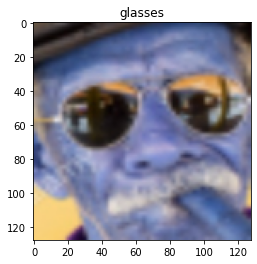

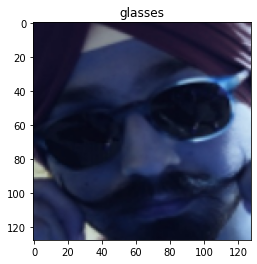

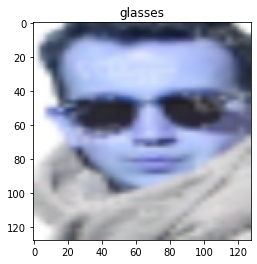

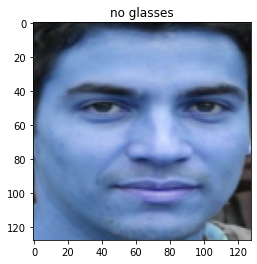

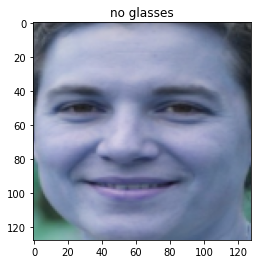

In [27]:
labels={0:'no glasses',1:'glasses'}
for i in range(5):
  n=random.randint(0,len(X_train)-1)
  plt.figure()
  plt.title(labels[y_train[n]])
  plt.imshow(X_train[n])

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [40]:
model=Sequential([
    Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Dropout(0.2),
    Conv2D(filters=128,kernel_size=(5,5),activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.5),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D((3,3)),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 59, 59, 128)       102528    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 29, 29, 128)      0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 29, 29, 128)      

In [43]:
opt=Adam(learning_rate=0.00005)

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [49]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
102/102 [==============================] - 218s 2s/step - loss: 0.6276 - accuracy: 0.6413 - val_loss: 0.5961 - val_accuracy: 0.8013
Epoch 2/10
102/102 [==============================] - 214s 2s/step - loss: 0.4077 - accuracy: 0.8305 - val_loss: 0.4416 - val_accuracy: 0.8046
Epoch 3/10
102/102 [==============================] - 216s 2s/step - loss: 0.2709 - accuracy: 0.9031 - val_loss: 0.3292 - val_accuracy: 0.8742
Epoch 4/10
102/102 [==============================] - 216s 2s/step - loss: 0.1797 - accuracy: 0.9363 - val_loss: 0.2851 - val_accuracy: 0.8725
Epoch 5/10
102/102 [==============================] - 216s 2s/step - loss: 0.1166 - accuracy: 0.9619 - val_loss: 0.2063 - val_accuracy: 0.9222
Epoch 6/10
102/102 [==============================] - 217s 2s/step - loss: 0.0865 - accuracy: 0.9732 - val_loss: 0.1937 - val_accuracy: 0.9272
Epoch 7/10
102/102 [==============================] - 216s 2s/step - loss: 0.0711 - accuracy: 0.9763 - val_loss: 0.1345 - val_accuracy: 0.9437

In [50]:
model.save('glassesornot.h5')